# Data Cleaning and EDA for Float Columns

**Basic imports**

In [33]:
%matplotlib inline
import numpy as np
import numpy.random as nd
import pandas as pd
import math
import matplotlib.pyplot as plt

import os
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import display


from collections import Counter

pd.set_option('display.max_columns', None)

**Additional Imports**

In [34]:
from IPython.display import display, HTML

**Load the data**

In [35]:
inputFile='../../data/smallData/tmp/AcceptedLoans.csv'
data=pd.read_csv(inputFile)
data.head()

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,NaN,Oct-18,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3

**Remove Columns that are entirely empty**

In [36]:
data = data.loc[:, (data.isna().sum(axis=0) != len(data))]
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,NaN,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,NaN,Jun-17,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783.0,53.90%,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30,NaN,Apr-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


**Check Data Types**

In [37]:
types = data.dtypes
types

id                             object
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
mths_since_l

**Get Float Columns**

In [38]:
float_cols = types[types == 'float64']
float_cols

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
installment                   float64
annual_inc                    float64
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
mths_since_last_delinq        float64
mths_since_last_record        float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
total_acc                     float64
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_inv               float64
total_rec_prncp               float64
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
collection_recovery_fee       float64
last_pymnt_amnt               float64
collections_12_mths_ex_med    float64
policy_code                   float64
acc_now_deli

## CLEAN THE FLOAT FEATURES

To clean the float features we will perform the following steps:
1. Make sure missing values are `None` by examining rows where the data is 0, +inf, or -inf
2. Examine edge cases by looking at lowest 20 rows and highest 20 rows
3. Check to see if data should be categorical by looking at number of unique values

In [39]:
def examine(col_name, df):
    print("rows where data is 0, +inf, or -inf")
    iszero = df[col_name] == 0
    isinf = (df[col_name] == np.inf) | (df[col_name] == -np.inf)
    display(df[iszero|isinf])
    print("highest 20 rows")
    display(df[df[col_name].notna()].sort_values(col_name).head(20))
    print("lowest 20 rows")
    display(df[df[col_name].notna()].sort_values(col_name).tail(20))
    df[col_name].hist()
    print("Number of unique values:",len(df[col_name].unique()))

In [40]:
def add_max(col_name, new_col_name, df):
    df[new_col_name] = df[col_name] == df[col_name].max()
    return df

def add_min(col_name, new_col_name, df):
    df[new_col_name] = df[col_name] == df[col_name].min()
    return df

def add_is_zero_col(col_name, new_col_name, df):
    df[new_col_name] = df[col_name] == 0
    return df

**Loan amount:** The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

Analysis:

In [41]:
col = float_cols.index[0]
print('column:', col)

column: loan_amnt


rows where data is 0, +inf, or -inf


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


highest 20 rows


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
42323,NaN,500.0,500.0,200.000000,36 months,12.49%,16.73,D,D3,Polynesian Isles Resort,1 year,RENT,18000.00,Not Verified,Nov-07,Does not meet the credit policy. Status:Fully ...,n,to pay high interest rate credit card,credit_card,syndicatelotto,347xx,FL,19.20,4.0,Oct-93,1.0,16.0,0.0,15.0,0.0,9231.0,44%,36.0,f,0.0,0.0,597.344924,238.94,500.00,97.34,0.0,0.00,0.00,May-10,2.62,Jun-10,May-10,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
39466,NaN,500.0,500.0,475.000000,36 months,11.41%,16.47,C,C3,Global Travel International -and- Global Domai...,< 1 year,RENT,19500.00,Not Verified,Jan-08,Fully Paid,n,"Heart contentions, to leviate one credit card,...",other,A's2Zee's,222xx,VA,3.69,0.0,Nov-83,0.0,0.0,57.0,8.0,1.0,12229.0,90.60%,15.0,f,0.0,0.0,582.581606,553.45,500.00,67.58,15.0,0.00,0.00,Jul-09,255.57,NaN,Jul-09,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
39442,NaN,500.0,500.0,500.000000,36 months,10.46%,16.25,B,B5,THe University of Illinois,3 years,MORTGAGE,26000.00,Not Verified,Jan-08,Fully Paid,n,I need a small injection of cash to take care ...,small_business,Financing for business,618xx,IL,14.17,0.0,Jul-94,0.0,38.0,0.0,8.0,0.0,5643.0,60.70%,28.0,f,0.0,0.0,526.332241,526.33,500.00,26.33,0.0,0.00,0.00,Nov-08,180.61,NaN,Dec-08,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
39344,NaN,500.0,500.0,500.000000,36 months,10.71%,16.31,B,B5,NaN,< 1 year,MORTGAGE,7904.04,Not Verified,Jan-08,Fully Paid,n,help pay for flight travel,vacation,go on vacation in 08,953xx,CA,3.04,1.0,Feb-89,2.0,8.0,0.0,3.0,0.0,44.0,3.70%,6.0,f,0.0,0.0,580.462795,580.46,500.00,80.46,0.0,0.00,0.00,May-10,158.54,NaN,Dec-13,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
41827,NaN,500.0,500.0,500.000000,36 months,8.00%,15.67,A,A3,Druid Hills Bookstore,1 year,RENT,3300.00,Not Verified,Mar-08,Does not meet the credit policy. Status:Fully ...,n,I am using the money to pay for a college degr...,educational,Help me pay for school,303xx,GA,0.00,0.0,Aug-06,0.0,NaN,NaN,3.0,0.0,0.0,0%,3.0,f,0.0,0.0,541.280194,541.28,500.00,41.28,0.0,0.00,0.00,Jul-09,26.39,Aug-09,Jun-10,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
41707,NaN,500.0,500.0,500.000000,36 months,8.32%,15.75,A,A4,Reliant Energy,1 year,OTHER,100000.00,Not Verified,Apr-08,Does not meet the credit policy. Status:Fully ...,n,My dog Jesse recently was in an accident with ...,medical,Need to Pay for Dog's Vet Bill,770xx,TX,14.02,0.0,Jun-05,1.0,NaN,NaN,4.0,0.0,56.0,5.60%,6.0,f,0.0,0.0,503.540000,503.54,500.00,3.54,0.0,0.00,0.00,May-08,503.59,Jun-08,Mar-08,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
39613,NaN,500.0,500.0,400.000000,36 months,8.07%,15.69,A,A4,NaN,< 1 year,RENT,18000.00,Not Verified,Nov-07,Fully Paid,n,"I currently live with my parents, study, and w...",other,buying a new computer,112xx,NY,4.27,0.0,Nov-03,0.0,0.0,0.0,4.0,0.0,0.0,0%,4.0,f,0.0,0.0,565.025158,452.02,500.00,65.03,0.0,0.00,0.00,Dec-10,33.16,NaN,Nov-15,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


lowest 20 rows


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
4723,NaN,35000.0,35000.0,34975.00000,60 months,18.64%,901.01,E,E1,US Marine Corps,10+ years,MORTGAGE,80000.0,Verified,Nov-11,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,284xx,NC,22.72,0.0,Dec-00,1.0,40.0,NaN,15.0,0.0,13415.0,60.70%,41.0,f,0.0,0.0,52944.99994,52907.18,35000.00,17945.00,0.000000,0.00,0.0000,Oct-15,11512.11,NaN,May-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5678,NaN,35000.0,35000.0,34975.00000,60 months,20.89%,944.71,F,F1,"Oxner Thomas + Permar, pllc",2 years,MORTGAGE,80000.0,Verified,Oct-11,Fully Paid,n,NaN,debt_consolidation,Debt Consolidation Loan,274xx,NC,24.39,0.0,Jan-89,1.0,NaN,NaN,5.0,0.0,27850.0,93.80%,16.0,f,0.0,0.0,55906.94990,55867.02,35000.00,20906.95,0.000000,0.00,0.0000,Dec-15,9616.16,NaN,Aug-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
13183,NaN,35000.0,21825.0,21800.00000,36 months,13.49%,740.54,C,C2,Municipal Market Advisors,10+ years,MORTGAGE,381450.0,Source Verified,Jun-11,Fully Paid,n,I have very secure employment for over 10+ yea...,home_improvement,My $ + Lending Club $ = Pool,342xx,FL,3.96,0.0,Sep-96,0.0,30.0,NaN,10.0,0.0,6649.0,0%,27.0,f,0.0,0.0,25943.46588,25913.75,21825.00,4118.47,0.000000,0.00,0.0000,May-13,9672.67,NaN,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
13179,NaN,35000.0,24875.0,24875.00000,36 months,18.39%,904.17,E,E2,PricewaterhouseCoopers,10+ years,MORTGAGE,300000.0,Verified,Jun-11,Fully Paid,n,Borrower added on 06/14/11 > Loan will conso...,debt_consolidation,Consolidation Loan,900xx,CA,16.12,3.0,Jan-90,1.0,18.0,NaN,9.0,0.0,47393.0,90%,32.0,f,0.0,0.0,31380.98782,31380.99,24875.00,6505.99,0.000000,0.00,0.0000,May-13,11521.90,NaN,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4727,NaN,35000.0,35000.0,34950.00000,60 months,12.69%,790.82,B,B5,"SPM, LLC",4 years,MORTGAGE,150000.0,Verified,Nov-11,Fully Paid,n,Borrower added on 10/29/11 > I am using this...,home_improvement,Pool Loan,352xx,AL,7.55,0.0,Jun-92,1.0,NaN,NaN,6.0,0.0,6177.0,32.30%,24.0,f,0.0,0.0,47483.28903,47415.46,34999.99,12483.30,0.000000,0.00,0.0000,Nov-16,790.36,NaN,Nov-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3055,NaN,35000.0,35000.0,35000.00000,36 months,18.25%,1269.73,D,D5,NaN,NaN,RENT,162000.0,Verified,Nov-11,Charged Off,n,Borrower added on 11/15/11 > Purpose to Redu...,debt_consolidation,Debt Consolidation Loan,917xx,CA,19.81,0.0,Nov-82,1.0,NaN,NaN,17.0,0.0,86994.0,53.90%,33.0,f,0.0,0.0,28924.14000,28924.14,17609.93,9733.56,63.400203,1517.25,257.9325,Jun-14,505.75,NaN,Aug-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,Y,Feb-15,COMPLETE,Oct-13,6069.0,29.13,0.0
3447,NaN,35000.0,35000.0,34852.55228,60 months,22.06%,967.86,F,F4,Onyx Specialty Papers,5 years,RENT,67000.0,Verified,Nov-11,Fully Paid,n,Borrower added on 11/10/11 > This loan is to...,debt_consolidation,Credit Card Consolidation Loan,012xx,MA,21.55,0.0,May-99,0.0,NaN,NaN,10.0,0.0,40746.0,99.60%,22.0,f,0.0,0.0,58133.31990,57863.51,35000.00,23084.93,48.390000,0.00,0.0000,Oct-16,1949.05,NaN,Dec-17,0.0,1.0,Indi

Number of unique values: 899


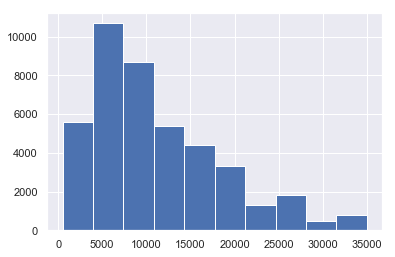

In [42]:
examine(col, data)

**Conclusions:**  
**Missing data:** N/A  
**Extremes:** Since there are so many entries at the edge of the distribution, we will assume that loan applications are limited to 500-35000 . I will add a boolean column to indicate that the maximum was reached.  
**Unique values:** N/A


In [43]:
data = add_max(col, col +'_is_max', data)
data = add_min(col, col +'_is_min', data)

**funded_amnt:** The total amount committed to that loan at that point in time.

Analysis:

In [44]:
col = float_cols.index[1]
print('column:', col)

column: funded_amnt


rows where data is 0, +inf, or -inf


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max


highest 20 rows


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max
39613,NaN,500.0,500.0,400.000000,36 months,8.07%,15.69,A,A4,NaN,< 1 year,RENT,18000.00,Not Verified,Nov-07,Fully Paid,n,"I currently live with my parents, study, and w...",other,buying a new computer,112xx,NY,4.27,0.0,Nov-03,0.0,0.0,0.0,4.0,0.0,0.0,0%,4.0,f,0.0,0.0,565.025158,452.02,500.00,65.03,0.0,0.00,0.00,Dec-10,33.16,NaN,Nov-15,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True
39344,NaN,500.0,500.0,500.000000,36 months,10.71%,16.31,B,B5,NaN,< 1 year,MORTGAGE,7904.04,Not Verified,Jan-08,Fully Paid,n,help pay for flight travel,vacation,go on vacation in 08,953xx,CA,3.04,1.0,Feb-89,2.0,8.0,0.0,3.0,0.0,44.0,3.70%,6.0,f,0.0,0.0,580.462795,580.46,500.00,80.46,0.0,0.00,0.00,May-10,158.54,NaN,Dec-13,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True
39466,NaN,500.0,500.0,475.000000,36 months,11.41%,16.47,C,C3,Global Travel International -and- Global Domai...,< 1 year,RENT,19500.00,Not Verified,Jan-08,Fully Paid,n,"Heart contentions, to leviate one credit card,...",other,A's2Zee's,222xx,VA,3.69,0.0,Nov-83,0.0,0.0,57.0,8.0,1.0,12229.0,90.60%,15.0,f,0.0,0.0,582.581606,553.45,500.00,67.58,15.0,0.00,0.00,Jul-09,255.57,NaN,Jul-09,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True
42365,NaN,500.0,500.0,125.000000,36 months,9.01%,15.91,B,B2,NaN,< 1 year,RENT,2000.00,Not Verified,Oct-07,Does not meet the credit policy. Status:Charge...,n,I need this loan to help pay for training in a...,other,Loan for Job Training,727xx,AR,0.00,0.0,Feb-07,6.0,0.0,0.0,2.0,0.0,0.0,0%,2.0,f,0.0,0.0,83.890000,20.98,49.04,14.44,0.0,20.41,0.20,Feb-08,15.90,Dec-08,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True
42420,NaN,500.0,500.0,375.000000,36 months,8.38%,15.76,A,A5,us army,2 years,RENT,33000.00,Not Verified,Sep-07,Does not meet the credit policy. Status:Fully ...,n,I am needing to get a personal loan for $2500 ...,other,Paying bills.,664xx,KS,2.15,0.0,Apr-90,10.0,0.0,0.0,6.0,0.0,3461.0,18.60%,6.0,f,0.0,0.0,557.535277,418.15,500.00,57.54,0.0,0.00,0.00,Sep-09,212.24,Sep-09,Aug-09,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True
39442,NaN,500.0,500.0,500.000000,36 months,10.46%,16.25,B,B5,THe University of Illinois,3 years,MORTGAGE,26000.00,Not Verified,Jan-08,Fully Paid,n,I need a small injection of cash to take care ...,small_business,Financing for business,618xx,IL,14.17,0.0,Jul-94,0.0,38.0,0.0,8.0,0.0,5643.0,60.70%,28.0,f,0.0,0.0,526.332241,526.33,500.00,26.33,0.0,0.00,0.00,Nov-08,180.61,NaN,Dec-08,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True
41707,NaN,500.0,500.0,500.000000,36 months,8.32%,15.75,A,A4,Reliant Energy,1 year,OTHER,100000.00,Not Verified,Apr-08,Does not meet the credit policy. Status:Fully ...,n,My dog Jesse recently was in an accident with ...,medical,Need to Pay for Dog's Vet Bill,770xx,TX,14.02,0.0,Jun-05,1.0,NaN,NaN,4.0,0.0,56.0,5.60%,6.0,f,0.0,0.0,503.540000,503.54,500.00,3.54,0.0,0.00,0.00,May-08,503.59,Jun-08,Mar-08,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN

lowest 20 rows


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max
3493,NaN,35000.0,35000.0,35000.00000,36 months,11.71%,1157.66,B,B3,Anglepoint,3 years,MORTGAGE,250000.0,Verified,Nov-11,Fully Paid,n,NaN,small_business,test,945xx,CA,4.13,0.0,Apr-91,2.0,52.0,NaN,4.0,0.0,4901.0,10.90%,16.0,f,0.0,0.0,37780.56889,37780.57,35000.00,2780.57,0.0,0.00,0.0000,Aug-12,28531.89,NaN,Sep-12,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False
7232,NaN,35000.0,35000.0,34750.00000,36 months,8.90%,1111.37,A,A5,Bureau of Alcohol Tobacco Firearms,10+ years,OWN,90000.0,Verified,Sep-11,Fully Paid,n,NaN,debt_consolidation,payoff,140xx,NY,13.79,0.0,Apr-93,0.0,NaN,NaN,10.0,0.0,18424.0,43.70%,25.0,f,0.0,0.0,40009.00999,39723.23,35000.00,5009.01,0.0,0.00,0.0000,Oct-14,1125.79,NaN,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False
8949,NaN,35000.0,35000.0,34975.00000,60 months,17.99%,888.58,E,E1,Turning Point for God,2 years,RENT,93500.0,Verified,Aug-11,Charged Off,n,I will use the funds to pay credit cards that...,debt_consolidation,Financial Health!,921xx,CA,14.57,0.0,Nov-98,3.0,NaN,NaN,15.0,0.0,27893.0,66.30%,31.0,f,0.0,0.0,5331.48000,5327.69,2263.44,3060.36,0.0,7.68,0.0000,Mar-12,888.58,NaN,Mar-17,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False
6143,NaN,35000.0,35000.0,35000.00000,60 months,11.71%,773.44,B,B3,Village of Lombard,4 years,OWN,90000.0,Verified,Oct-11,Fully Paid,n,NaN,debt_consolidation,Debt Removal,604xx,IL,8.31,0.0,Jul-74,0.0,NaN,NaN,6.0,0.0,9535.0,49.90%,16.0,f,0.0,0.0,40982.33589,40982.34,35000.00,5982.34,0.0,0.00,0.0000,Jun-13,26296.21,NaN,Jun-13,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False
10952,NaN,35000.0,35000.0,30693.51512,60 months,12.99%,796.18,C,C1,Syracuse Uiversity,5 years,MORTGAGE,65000.0,Verified,Jul-11,Charged Off,n,Borrower added on 07/22/11 > I am looking fo...,home_improvement,Home Improvement,132xx,NY,21.06,0.0,Sep-93,3.0,NaN,NaN,12.0,0.0,8685.0,27.70%,27.0,f,0.0,0.0,30292.94000,22596.81,19470.12,10787.08,0.0,35.74,0.0000,Nov-14,796.18,NaN,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False
14242,NaN,35000.0,35000.0,34900.00000,36 months,15.23%,1217.24,C,C5,Intrigo systems Inc,1 year,MORTGAGE,160000.0,Verified,Jun-11,Fully Paid,n,Borrower added on 05/28/11 > The Loan amount...,home_improvement,Home improvement,951xx,CA,7.37,0.0,May-01,1.0,NaN,NaN,5.0,0.0,113658.0,33.80%,16.0,f,0.0,0.0,42685.02789,42563.07,35000.00,7685.03,0.0,0.00,0.0000,Jun-13,14763.30,NaN,Jun-13,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False
7908,NaN,35000.0,35000.0,34756.17466,60 months,15.99%,850.95,D,D2,City of Stamford,5 years,MORTGAGE,76000.0,Verified,Sep-11,Fully Paid,n,Borrower added on 09/07/11 > Home Improvemen...,home_improvement,Nest Egg Remodeling,066xx,CT,0.79,0.0,Dec-84,7.0,NaN,NaN,17.0,0.0,0.0,0%,40.0,f,0.0,0.0,47527.51917,47058.56,35000.00,12527.52,0.0,0.00,0.0000,Jul-14,19492.65,NaN,Jul-14,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False
5689,NaN,35000.0,35000.0,35000.00000,36 months,18.64%,1276.

Number of unique values: 1052


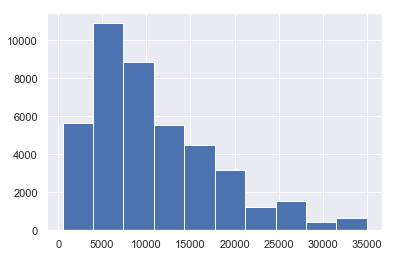

In [45]:
examine(col, data)

**Conclusions:**  
**Missing data:** N/A  
**Extremes:** Since there are so many entries at the edge of the distribution, we will assume that loan applications are limited to 500-35000 . I will add a boolean column to indicate that the maximum was reached.  
**Unique values:** N/A


In [46]:
data = add_max(col, col +'_is_max', data)
data = add_min(col, col +'_is_min', data)

**funded_amnt_inv:** The total amount committed by investors for that loan at that point in time.

Analysis:

In [47]:
col = float_cols.index[2]
print('column:', col)

column: funded_amnt_inv


rows where data is 0, +inf, or -inf


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max,funded_amnt_is_max
38457,NaN,1775.0,1775.0,0.0,36 months,12.72%,59.57,C,C4,San Jose Business Journal,< 1 year,RENT,45000.0,Not Verified,Oct-08,Fully Paid,n,"As a working journalist, I need a dependable w...",major_purchase,Computer equipment,946xx,CA,10.64,3.0,Jan-00,0.0,23.0,NaN,12.0,0.0,1030.0,4.60%,15.0,f,0.0,0.0,1939.253316,0.0,1775.00,164.25,0.000000,0.00,0.0000,Mar-10,45.85,NaN,Aug-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
38461,NaN,7500.0,7500.0,0.0,36 months,10.01%,242.04,B,B2,Fannie Mae,10+ years,MORTGAGE,79000.0,Not Verified,Oct-08,Fully Paid,n,This loan will be used to buy new sky lights t...,renewable_energy,Decrease utility bills,220xx,VA,15.21,1.0,Feb-95,0.0,16.0,NaN,17.0,0.0,2801.0,6.70%,42.0,f,0.0,0.0,7683.190000,0.0,7500.00,183.19,0.000000,0.00,0.0000,Jan-09,7199.14,NaN,Jan-09,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
38462,NaN,4000.0,4000.0,0.0,36 months,7.68%,124.76,A,A2,St Josephs Research Institute,1 year,RENT,41004.0,Verified,Oct-08,Fully Paid,n,major purchase,other,Amy,300xx,GA,10.74,0.0,Mar-96,3.0,NaN,NaN,11.0,0.0,2775.0,13.70%,18.0,f,0.0,0.0,4331.131291,0.0,4000.00,331.13,0.000000,0.00,0.0000,Feb-10,2459.88,NaN,Feb-10,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
38465,NaN,3200.0,2100.0,0.0,36 months,7.68%,65.50,A,A2,NaN,< 1 year,MORTGAGE,55800.0,Not Verified,Oct-08,Fully Paid,n,Hello! I'm going to have to sell my house and ...,moving,Moving from Atlanta Fund,300xx,GA,3.59,0.0,Feb-88,1.0,NaN,NaN,13.0,0.0,14538.0,32%,30.0,f,0.0,0.0,2208.784526,0.0,2100.00,108.78,0.000000,0.00,0.0000,Jul-09,1684.87,NaN,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
38466,NaN,7500.0,7500.0,0.0,36 months,11.59%,247.65,C,C2,The Blackstone Group,2 years,RENT,116600.0,Not Verified,Oct-08,Fully Paid,n,Pay off Credit Card Debt that I accumulated du...,credit_card,Pay off CreditCard Debt from Grad School,070xx,NJ,11.89,0.0,Oct-00,1.0,NaN,NaN,19.0,0.0,25588.0,58%,33.0,f,0.0,0.0,8707.530212,0.0,7500.00,1207.53,0.000000,0.00,0.0000,Oct-10,1.23,NaN,Feb-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
38468,NaN,7000.0,6100.0,0.0,36 months,11.28%,200.52,C,C1,Bank of Pensacola,1 year,MORTGAGE,34000.0,Not Verified,Oct-08,Fully Paid,n,I would like to consolidate my school loans an...,debt_consolidation,Paying off School Loans,325xx,FL,10.06,0.0,Nov-03,1.0,32.0,NaN,9.0,0.0,5129.0,35.40%,23.0,f,0.0,0.0,6267.973244,0.0,6100.00,167.97,0.000000,0.00,0.0000,Jan-09,5866.96,NaN,Jan-09,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
38475,NaN,7500.0,4750.0,0.0,36 months,11.28%,156.14,C,C1,American Express,< 1 year,MORTGAGE,87000.0,Verified,Oct-08,Fully Paid,n,Need loan for debt consolidation,debt_consolidation,Loan for debt consolidation,853xx,AZ,1.32,0.0,Apr-05,1.0,NaN,NaN,7.0,0.0,10318.0,30.90%,7.0,f,0.0,0.0,5027.561537,0.0,4750.00,277.56,0.000000,0.00,0.0000,May-09,2746.92,NaN,Apr-09,0.0,1.0,Individual,0.0,0.0,0.0,0

highest 20 rows


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max,funded_amnt_is_max
42537,NaN,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,Homemaker,10+ years,MORTGAGE,70000.0,Not Verified,Jun-07,Does not meet the credit policy. Status:Fully ...,n,I need to make several improvements around the...,other,Aroundthehouse,068xx,CT,8.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,5619.762090,0.0,5000.00,619.76,0.0,0.00,0.00,Jun-10,156.39,Jul-10,Feb-15,NaN,1.0,Individual,NaN,NaN,NaN,NaN,NaN,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
41521,NaN,4000.0,4000.0,0.0,36 months,18.54%,145.70,G,G4,Moody's Investor Services,< 1 year,RENT,60000.0,Not Verified,Jul-08,Does not meet the credit policy. Status:Fully ...,n,I recently relocated to NYC for a career advan...,moving,Relocated to NYC for Career,100xx,NY,28.41,0.0,Sep-03,0.0,NaN,NaN,12.0,0.0,18242.0,70.20%,24.0,f,0.0,0.0,5247.141686,0.0,4000.00,1247.14,0.0,0.00,0.00,Aug-11,2.26,Sep-11,Aug-11,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
41524,NaN,7500.0,7500.0,0.0,36 months,15.45%,261.65,E,E5,Innovative Technology Holdings,3 years,MORTGAGE,55000.0,Not Verified,Jul-08,Does not meet the credit policy. Status:Charge...,n,I am requesting a loan to consolidate some of ...,credit_card,A little Debt Consolidation,614xx,IL,24.94,0.0,Apr-94,8.0,NaN,NaN,16.0,0.0,41705.0,95.20%,24.0,f,0.0,0.0,1308.250000,0.0,846.90,461.25,0.0,0.10,0.00,Dec-08,261.65,Oct-09,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
38547,NaN,7500.0,6700.0,0.0,36 months,10.01%,216.23,B,B2,Beef o Bradys,< 1 year,RENT,40000.0,Not Verified,Aug-08,Charged Off,n,I am opening a Family sports pub in a few week...,other,Business Opening family sports Pub,331xx,FL,5.13,0.0,May-91,3.0,NaN,96.0,6.0,1.0,4225.0,28.90%,15.0,f,0.0,0.0,3013.850000,0.0,2191.81,618.92,0.0,203.12,2.03,Sep-09,216.23,NaN,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,1.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
41529,NaN,7500.0,7500.0,0.0,36 months,11.03%,245.65,C,C1,Social Security Administration (SSA),6 years,MORTGAGE,45000.0,Not Verified,Jul-08,Does not meet the credit policy. Status:Fully ...,n,need to consolidate credit card bils and medic...,credit_card,personal,352xx,AL,11.41,0.0,Apr-95,7.0,70.0,NaN,15.0,0.0,5148.0,12.70%,52.0,f,0.0,0.0,8585.887078,0.0,7500.00,1085.89,0.0,0.00,0.00,Apr-10,3673.26,May-10,May-10,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
41530,NaN,7225.0,5300.0,0.0,36 months,14.18%,181.61,E,E1,Juri Staff,8 years,RENT,54996.0,Not Verified,Jul-08,Does not meet the credit policy. Status:Fully ...,n,Combining several small balances.,debt_consolidation,Consolidation,191xx,PA,10.04,0.0,Jul-94,3.0,31.0,NaN,4.0,0.0,3729.0,70.40%,12.0,f,0.0,0.0,5362.630000,0.0,5300.00,62.63,0.0,0.00,0.00,Aug-08,5362.64,Sep-08,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
38546,NaN,6000.0,6000.0,0.0,36 months,7.68%,187.14,A,A2,Dental Network of America,2 years,MORTGAGE,175000.0,Not Verified,Aug-08,Fully Paid,n,My wife and I have plans to remodel our master...,home_improvemen

lowest 20 rows


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max,funded_amnt_is_max
5544,NaN,35000.0,35000.0,35000.0,60 months,13.49%,805.17,C,C1,springfield acura,1 year,MORTGAGE,85000.0,Source Verified,Oct-11,Fully Paid,n,Borrower added on 10/09/11 > buying a pizza ...,small_business,Small Business Loan,078xx,NJ,8.98,0.0,Nov-84,2.0,NaN,NaN,10.0,0.0,9178.0,12.20%,23.0,f,0.0,0.0,35393.95646,35393.96,35000.00,393.96,0.0,0.00,0.0000,Nov-11,35395.59,NaN,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
185,NaN,35000.0,35000.0,35000.0,36 months,10.65%,1140.07,B,B2,baylor college of medicine,2 years,MORTGAGE,168000.0,Verified,Dec-11,Fully Paid,n,NaN,debt_consolidation,pertsonal loan,775xx,TX,3.17,1.0,Dec-02,1.0,22.0,NaN,16.0,0.0,1099.0,1.40%,22.0,f,0.0,0.0,38061.50488,38061.50,35000.00,3061.50,0.0,0.00,0.0000,Oct-13,272.59,NaN,Sep-13,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
3218,NaN,35000.0,35000.0,35000.0,36 months,7.90%,1095.16,A,A4,"Acumen, Inc.",2 years,RENT,95000.0,Verified,Nov-11,Fully Paid,n,NaN,credit_card,Credit Card Loan,850xx,AZ,15.33,0.0,Nov-94,0.0,NaN,NaN,9.0,0.0,41346.0,34.80%,39.0,f,0.0,0.0,39425.71999,39425.72,35000.00,4425.72,0.0,0.00,0.0000,Dec-14,1110.23,NaN,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2968,NaN,35000.0,35000.0,35000.0,36 months,7.90%,1095.16,A,A4,NaN,10+ years,MORTGAGE,408000.0,Verified,Dec-11,Fully Paid,n,Borrower added on 11/16/11 > Back Yard Pool ...,home_improvement,Back Yard,957xx,CA,9.93,0.0,Mar-92,0.0,NaN,NaN,11.0,0.0,33167.0,18.10%,35.0,f,0.0,0.0,39322.49746,39322.50,35000.00,4322.50,0.0,0.00,0.0000,Oct-14,2845.86,NaN,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
3103,NaN,35000.0,35000.0,35000.0,36 months,18.64%,1276.60,E,E1,"State of CA, Dept. Juvenile Justice",5 years,MORTGAGE,146000.0,Verified,Nov-11,Fully Paid,n,NaN,debt_consolidation,Debt Consolidation,920xx,CA,14.91,0.0,Feb-71,1.0,37.0,NaN,14.0,0.0,28604.0,68.10%,49.0,f,0.0,0.0,45279.12890,45279.13,35000.00,10279.13,0.0,0.00,0.0000,Apr-14,10820.77,NaN,May-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1334,NaN,35000.0,35000.0,35000.0,60 months,17.27%,874.93,D,D3,Metropolitan Life Insurance Co,10+ years,OWN,68750.0,Verified,Dec-11,Fully Paid,n,Borrower added on 12/05/11 > Baloon payment<br>,other,Other,023xx,MA,14.77,0.0,Aug-84,1.0,NaN,NaN,14.0,0.0,23561.0,54.70%,20.0,f,0.0,0.0,41959.64900,41959.65,35000.00,6959.65,0.0,0.00,0.0000,Mar-13,29718.80,NaN,Mar-13,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1842,NaN,35000.0,35000.0,35000.0,60 months,17.27%,874.93,D,D3,The Falk Group,3 years,MORTGAGE,325000.0,Source Verified,Dec-11,Fully Paid,n,NaN,debt_consolidation,Debt Consolidation,088xx,NJ,5.65,0.0,Mar-91,6.0,NaN,NaN,6.0,0.0,17695.0,93.10%,25.0,f,0.0,0.0,48612.77219,48612.77,35000.00,13612.77,0.0,0.00,0.0000,Oct-14,19750.29,NaN,Oct-14,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False
5682,NaN,35000.0,35000.0,35000.0,60 months,1

Number of unique values: 9245


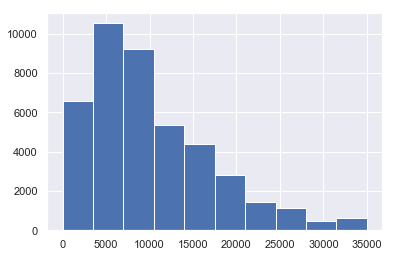

In [48]:
examine(col, data)

**Conclusions:**  
**Missing data:** N/A  
**Extremes:** 0 indicates that this is first loan. We'll add a column for first loan.  
**Unique values:** N/A

In [49]:
data = add_is_zero_col(col,"first_loan", data)

**installment:** The monthly payment owed by the borrower if the loan originates.

Analysis:

In [50]:
col = float_cols.index[3]
print('column:', col)

column: installment


rows where data is 0, +inf, or -inf


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max,funded_amnt_is_max,first_loan


highest 20 rows


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max,funded_amnt_is_max,first_loan
41827,NaN,500.0,500.0,500.00,36 months,8.00%,15.67,A,A3,Druid Hills Bookstore,1 year,RENT,3300.00,Not Verified,Mar-08,Does not meet the credit policy. Status:Fully ...,n,I am using the money to pay for a college degr...,educational,Help me pay for school,303xx,GA,0.00,0.0,Aug-06,0.0,NaN,NaN,3.0,0.0,0.0,0%,3.0,f,0.0,0.0,541.280194,541.28,500.00,41.28,0.0,0.00,0.0,Jul-09,26.39,Aug-09,Jun-10,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False
39613,NaN,500.0,500.0,400.00,36 months,8.07%,15.69,A,A4,NaN,< 1 year,RENT,18000.00,Not Verified,Nov-07,Fully Paid,n,"I currently live with my parents, study, and w...",other,buying a new computer,112xx,NY,4.27,0.0,Nov-03,0.0,0.0,0.0,4.0,0.0,0.0,0%,4.0,f,0.0,0.0,565.025158,452.02,500.00,65.03,0.0,0.00,0.0,Dec-10,33.16,NaN,Nov-15,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False
41707,NaN,500.0,500.0,500.00,36 months,8.32%,15.75,A,A4,Reliant Energy,1 year,OTHER,100000.00,Not Verified,Apr-08,Does not meet the credit policy. Status:Fully ...,n,My dog Jesse recently was in an accident with ...,medical,Need to Pay for Dog's Vet Bill,770xx,TX,14.02,0.0,Jun-05,1.0,NaN,NaN,4.0,0.0,56.0,5.60%,6.0,f,0.0,0.0,503.540000,503.54,500.00,3.54,0.0,0.00,0.0,May-08,503.59,Jun-08,Mar-08,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False
42420,NaN,500.0,500.0,375.00,36 months,8.38%,15.76,A,A5,us army,2 years,RENT,33000.00,Not Verified,Sep-07,Does not meet the credit policy. Status:Fully ...,n,I am needing to get a personal loan for $2500 ...,other,Paying bills.,664xx,KS,2.15,0.0,Apr-90,10.0,0.0,0.0,6.0,0.0,3461.0,18.60%,6.0,f,0.0,0.0,557.535277,418.15,500.00,57.54,0.0,0.00,0.0,Sep-09,212.24,Sep-09,Aug-09,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False
42365,NaN,500.0,500.0,125.00,36 months,9.01%,15.91,B,B2,NaN,< 1 year,RENT,2000.00,Not Verified,Oct-07,Does not meet the credit policy. Status:Charge...,n,I need this loan to help pay for training in a...,other,Loan for Job Training,727xx,AR,0.00,0.0,Feb-07,6.0,0.0,0.0,2.0,0.0,0.0,0%,2.0,f,0.0,0.0,83.890000,20.98,49.04,14.44,0.0,20.41,0.2,Feb-08,15.90,Dec-08,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False
38932,NaN,500.0,500.0,450.00,36 months,9.76%,16.08,B,B2,"Hughes, Hubbard & Reed LLP",7 years,MORTGAGE,59000.00,Not Verified,Mar-08,Fully Paid,n,I would like to pay off a chrge card from Kohl's.,other,Store Charge Card,117xx,NY,22.17,0.0,Aug-95,0.0,NaN,NaN,9.0,0.0,65414.0,47.80%,26.0,f,0.0,0.0,578.768140,520.89,500.00,78.77,0.0,0.00,0.0,Apr-11,17.25,NaN,May-13,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False
39442,NaN,500.0,500.0,500.00,36 months,10.46%,16.25,B,B5,THe University of Illinois,3 years,MORTGAGE,26000.00,Not Verified,Jan-08,Fully Paid,n,I need a small injection of cash to take care ...,small_business,Financing for business,618xx,IL,14.17,0.0,Jul-94,0.0,38.0,0.0,8.0,0.0,5643.0,60.70%,28.0,f,0.0,0.0,526.33

lowest 20 rows


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max,funded_amnt_is_max,first_loan
9514,NaN,35000.0,35000.0,34725.0000,36 months,17.49%,1256.40,D,D5,Bremer Financial Services,10+ years,MORTGAGE,130000.00,Verified,Aug-11,Fully Paid,n,Borrower added on 08/10/11 > I am using this...,credit_card,Credit Card Loan,551xx,MN,17.80,1.0,May-96,0.0,17.0,NaN,11.0,0.0,39791.0,74.90%,28.0,f,0.0,0.0,42382.14534,42049.14,35000.00,7382.15,0.000000,0.00,0.0000,Feb-13,21054.59,NaN,Mar-13,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
6577,NaN,35000.0,35000.0,35000.0000,36 months,17.58%,1257.98,D,D4,Darden Restaurants,< 1 year,MORTGAGE,305000.00,Source Verified,Oct-11,Fully Paid,n,Borrower added on 09/25/11 > I am a second t...,house,Home down payment loan,282xx,NC,12.15,2.0,Nov-94,3.0,12.0,NaN,8.0,0.0,84075.0,23.20%,30.0,f,0.0,0.0,43299.89630,43299.90,35000.00,8299.90,0.000000,0.00,0.0000,Jul-13,18167.49,NaN,Jul-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
7379,NaN,35000.0,35000.0,34975.0000,36 months,17.58%,1257.98,D,D4,Healthcare Partners,< 1 year,MORTGAGE,116000.00,Verified,Sep-11,Fully Paid,n,Borrower added on 09/14/11 > This is a credi...,debt_consolidation,Debt Consolidation.,913xx,CA,18.54,1.0,Apr-85,0.0,3.0,NaN,15.0,0.0,95127.0,86.70%,44.0,f,0.0,0.0,44913.92997,44881.85,35000.00,9913.93,0.000000,0.00,0.0000,Oct-14,186.60,NaN,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
18343,NaN,35000.0,35000.0,34925.0000,36 months,17.88%,1263.23,E,E5,Kerzner International,10+ years,MORTGAGE,102000.00,Verified,Mar-11,Fully Paid,n,Borrower added on 03/12/11 > for payroll fun...,small_business,devloan,333xx,FL,12.45,0.0,Jan-03,0.0,NaN,NaN,10.0,0.0,24034.0,71.30%,15.0,f,0.0,0.0,45476.18153,45378.73,35000.00,10476.18,0.000000,0.00,0.0000,Apr-14,1301.08,NaN,Mar-14,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
11524,NaN,35000.0,35000.0,35000.0000,36 months,17.99%,1265.16,E,E1,Ashland Inc,4 years,OWN,104000.00,Verified,Jul-11,Fully Paid,n,Borrower added on 07/12/11 > Consolidate Hig...,debt_consolidation,Project 2011,549xx,WI,20.55,0.0,Jan-94,0.0,NaN,NaN,10.0,0.0,50867.0,70%,29.0,f,0.0,0.0,45545.67835,45545.68,35000.00,10545.68,0.000000,0.00,0.0000,Aug-14,1297.80,NaN,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
6299,NaN,35000.0,35000.0,34925.0000,36 months,18.25%,1269.73,D,D5,CME Group,5 years,MORTGAGE,130000.00,Source Verified,Oct-11,Fully Paid,n,NaN,debt_consolidation,Personal debt consolidation,601xx,IL,13.74,0.0,Feb-00,2.0,NaN,NaN,11.0,0.0,25297.0,62.50%,21.0,f,0.0,0.0,45710.16602,45612.22,35000.00,10710.17,0.000000,0.00,0.0000,Oct-14,1316.31,NaN,Oct-14,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
3055,NaN,35000.0,35000.0,35000.0000,36 months,18.25%,1269.73,D,D5,NaN,NaN,RENT,162000.00,Verified,Nov-11,Charged Off,n,Borrower added on 11/15/11 > Purpose to Redu...,debt_consolidation,Debt Consolidation Loan,917xx,CA,19.81,0.0,Nov-82,1.0,NaN,NaN,

Number of unique values: 16460


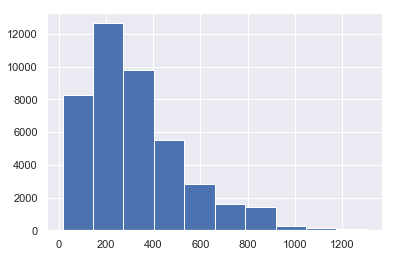

In [51]:
examine(col, data)

**Conclusions:**  
**Missing data:** N/A  
**Extremes:** N/A  
**Unique values:** N/A

**annual_inc:** The self-reported annual income provided by the borrower during registration.

Analysis:

In [52]:
col = float_cols.index[4]
print('column:', col)

column: annual_inc


rows where data is 0, +inf, or -inf


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max,funded_amnt_is_max,first_loan


highest 20 rows


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max,funded_amnt_is_max,first_loan
42440,NaN,1800.0,1800.0,775.000000,36 months,17.22%,64.38,G,G3,"disabled, student",1 year,RENT,1896.0,Not Verified,Aug-07,Does not meet the credit policy. Status:Fully ...,n,I am a mother of 2 who is going to school to b...,debt_consolidation,School expenses - consolidation,853xx,AZ,18.99,0.0,May-06,0.0,0.0,0.0,3.0,0.0,702.0,87.70%,3.0,f,0.0,0.0,2173.577549,935.85,1800.00,373.58,0.000000,0.00,0.00,Mar-09,1080.38,Apr-09,Jul-09,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
42365,NaN,500.0,500.0,125.000000,36 months,9.01%,15.91,B,B2,NaN,< 1 year,RENT,2000.0,Not Verified,Oct-07,Does not meet the credit policy. Status:Charge...,n,I need this loan to help pay for training in a...,other,Loan for Job Training,727xx,AR,0.00,0.0,Feb-07,6.0,0.0,0.0,2.0,0.0,0.0,0%,2.0,f,0.0,0.0,83.890000,20.98,49.04,14.44,0.000000,20.41,0.20,Feb-08,15.90,Dec-08,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False
41827,NaN,500.0,500.0,500.000000,36 months,8.00%,15.67,A,A3,Druid Hills Bookstore,1 year,RENT,3300.0,Not Verified,Mar-08,Does not meet the credit policy. Status:Fully ...,n,I am using the money to pay for a college degr...,educational,Help me pay for school,303xx,GA,0.00,0.0,Aug-06,0.0,NaN,NaN,3.0,0.0,0.0,0%,3.0,f,0.0,0.0,541.280194,541.28,500.00,41.28,0.000000,0.00,0.00,Jul-09,26.39,Aug-09,Jun-10,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False
42093,NaN,1600.0,1600.0,600.000000,36 months,7.43%,49.72,A,A2,NaN,< 1 year,RENT,3500.0,Not Verified,Jan-08,Does not meet the credit policy. Status:Fully ...,n,I would like to improve my credit score with h...,other,Improve Credit Score,069xx,CT,5.14,0.0,Jun-05,0.0,0.0,0.0,2.0,0.0,506.0,5.90%,6.0,f,0.0,0.0,1713.285949,642.48,1600.00,113.29,0.000000,0.00,0.00,May-09,267.80,May-09,Jul-09,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
41912,NaN,1525.0,1525.0,1450.000000,36 months,10.71%,49.72,B,B5,joyce thorn,< 1 year,RENT,3600.0,Not Verified,Mar-08,Does not meet the credit policy. Status:Charge...,n,my grandparents are extremily sick and cant ta...,moving,important move to texas,109xx,NY,11.33,0.0,Mar-05,1.0,0.0,0.0,5.0,0.0,3757.0,52.90%,6.0,f,0.0,0.0,452.640000,430.44,297.04,99.36,0.000000,56.24,0.60,Nov-08,49.72,Sep-09,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
42511,NaN,5350.0,5350.0,625.000000,36 months,13.12%,180.57,D,D5,Clinton Shop Rite of Hunterdon County,1 year,OWN,4000.0,Not Verified,Jul-07,Does not meet the credit policy. Status:Fully ...,n,NaN,car,I need to pay off my parents for my car.,088xx,NJ,15.00,0.0,Dec-06,1.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,f,0.0,0.0,6486.773238,757.80,5350.00,1121.77,15.000000,0.00,0.00,Feb-10,1056.94,Feb-10,Jul-13,NaN,1.0,Individual,0.0,NaN,0.0,NaN,NaN,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
42499,NaN,1200.0,1200.0,550.000000,36 months,10.28%,38.88,C,C1,Subway,< 1 year,RENT,4000.0,Not Verified,Jul-07,Does not meet the credit p

lowest 20 rows


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max,funded_amnt_is_max,first_loan
25888,NaN,19600.0,19600.0,19575.00000,36 months,13.98%,669.70,C,C3,J.P. Morgan Chase,10+ years,RENT,900000.0,Source Verified,Sep-10,Fully Paid,n,Borrower added on 09/10/10 > This loan will ...,wedding,Wedding loan,100xx,NY,1.04,3.0,Nov-99,0.0,5.0,NaN,6.0,0.0,301.0,13.10%,22.0,f,0.0,0.0,20482.869910,20456.74,19600.0,882.87,0.0,0.00,0.0000,Jan-11,18478.95,NaN,Jan-17,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
7552,NaN,30000.0,30000.0,30000.00000,36 months,12.69%,1006.35,B,B5,TIAA-CREF,10+ years,MORTGAGE,900000.0,Verified,Sep-11,Fully Paid,n,Borrower added on 09/11/11 > Deferred comp v...,home_improvement,Loan 1,280xx,NC,4.54,1.0,Mar-98,1.0,2.0,NaN,18.0,0.0,20260.0,9.20%,48.0,f,0.0,0.0,35172.083600,35172.08,30000.0,5172.08,0.0,0.00,0.0000,Jul-13,14058.59,NaN,Feb-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
34253,NaN,6000.0,6000.0,6000.00000,36 months,11.14%,196.83,B,B1,shannon medical center,8 years,MORTGAGE,900000.0,Not Verified,Nov-09,Fully Paid,n,564182 added on 10/30/09 > plan to do remodel...,major_purchase,money,769xx,TX,1.70,0.0,Jul-98,2.0,29.0,NaN,10.0,0.0,6530.0,23.30%,34.0,f,0.0,0.0,6791.800494,6791.80,6000.0,791.80,0.0,0.00,0.0000,May-11,3446.47,NaN,Jun-11,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
21444,NaN,2000.0,2000.0,2000.00000,36 months,9.99%,64.53,B,B4,Country Financial,10+ years,MORTGAGE,948000.0,Verified,Jan-11,Fully Paid,n,Borrower added on 12/31/10 > This loan is to...,debt_consolidation,PaynBills,617xx,IL,2.40,1.0,May-86,2.0,9.0,NaN,16.0,0.0,8515.0,29.40%,38.0,f,0.0,0.0,2323.180551,2323.18,2000.0,323.18,0.0,0.00,0.0000,Jan-14,73.26,NaN,Jan-14,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
39845,NaN,3000.0,3000.0,3000.00000,36 months,9.62%,96.27,B,B3,Macerich,10+ years,RENT,984000.0,Source Verified,Dec-10,Does not meet the credit policy. Status:Fully ...,n,NaN,other,New transmission for truck.,752xx,TX,0.29,0.0,Jan-99,4.0,NaN,99.0,5.0,1.0,221.0,1.40%,12.0,f,0.0,0.0,3326.866988,3326.87,3000.0,326.87,0.0,0.00,0.0000,May-12,1789.75,Jun-12,May-12,0.0,1.0,Individual,0.0,0.0,0.0,1.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
28975,NaN,4500.0,4500.0,4500.00000,60 months,7.88%,90.99,A,A5,St. John Lutheran Church,8 years,MORTGAGE,1080000.0,Source Verified,Jun-10,Fully Paid,n,NaN,major_purchase,Shadow Motorcycle,217xx,MD,0.57,0.0,Nov-83,0.0,31.0,NaN,7.0,0.0,46337.0,1.90%,20.0,f,0.0,0.0,5262.056984,5262.06,4500.0,762.06,0.0,0.00,0.0000,May-13,2269.27,NaN,May-13,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
27633,NaN,5600.0,5600.0,5600.00000,60 months,13.61%,129.18,C,C2,Dept of army,10+ years,MORTGAGE,1176000.0,Source Verified,Jul-10,Fully Paid,n,NaN,other,Help political campaign and pay bills,206xx,MD,1.22,1.0,Mar-97,0.0,4.0,NaN,6.0,0.0,11753.0,73.50%,25.0,f,0.0,0.0,7750.179998,7750.18,5600.0,2150.18,0.0,0.00,0.0000,Aug-15,137.79,NaN,Aug-15,0.0,1.0,Individual,0.0,0

Number of unique values: 5598


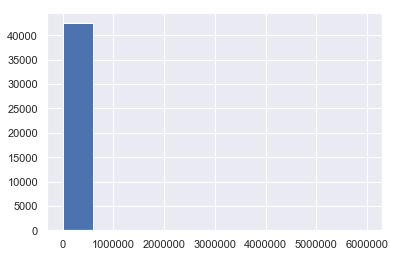

In [55]:
examine(col, data)

The distribution has a long tail, so we will recreate the histogram with only values under 100 000

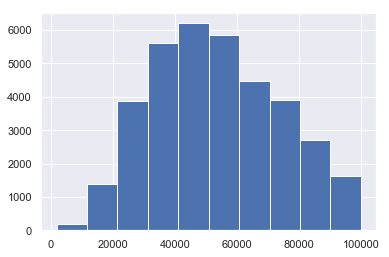

In [56]:
data[col][data[col] < 100000].hist()

**Conclusions:**  
**Missing data:** N/A  
**Extremes:** N/A  
**Unique values:** N/A

**dti:** A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

Analysis:

In [60]:
col = float_cols.index[5]
print('column:', col)

column: dti


rows where data is 0, +inf, or -inf


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max,funded_amnt_is_max,first_loan
2636,NaN,25000.0,25000.0,24950.000000,36 months,7.90%,782.26,A,A4,NaN,10+ years,MORTGAGE,200000.0,Source Verified,Nov-11,Fully Paid,n,Borrower added on 11/20/11 > Employment stab...,home_improvement,Home Improvement,021xx,MA,0.0,0.0,Feb-88,3.0,NaN,NaN,6.0,0.0,0.0,0%,14.0,f,0.0,0.0,25634.619510,25583.34,25000.00,634.62,0.000000,0.000000,0.0000,Apr-12,23291.01,NaN,Feb-13,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
2945,NaN,15000.0,15000.0,15000.000000,36 months,7.51%,466.67,A,A3,bnsf railway,9 years,MORTGAGE,65004.0,Not Verified,Nov-11,Fully Paid,n,NaN,other,Other,657xx,MO,0.0,0.0,Dec-02,0.0,NaN,NaN,4.0,0.0,0.0,0%,14.0,f,0.0,0.0,16214.565510,16214.57,15000.00,1214.57,0.000000,0.000000,0.0000,Apr-13,9227.42,NaN,Apr-13,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
3216,NaN,3500.0,3500.0,3500.000000,36 months,16.29%,123.56,D,D1,WiFiFee LLC.,3 years,MORTGAGE,50000.0,Not Verified,Nov-11,Charged Off,n,Borrower added on 11/12/11 > 2005 POLARIS SP...,major_purchase,ATV Loan,121xx,NY,0.0,1.0,Apr-02,0.0,10.0,NaN,3.0,0.0,0.0,0%,16.0,f,0.0,0.0,4023.320000,4023.32,3019.28,930.32,0.000000,73.720000,0.6940,Aug-14,123.56,NaN,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
4099,NaN,6500.0,6500.0,6500.000000,36 months,10.65%,211.73,B,B2,Donovan Hatem LLP,2 years,MORTGAGE,56650.0,Not Verified,Nov-11,Fully Paid,n,Borrower added on 10/31/11 > I acquired a de...,debt_consolidation,Loan Consolidation,021xx,MA,0.0,0.0,Oct-98,2.0,NaN,NaN,2.0,0.0,0.0,0%,7.0,f,0.0,0.0,7267.224670,7267.22,6500.00,767.22,0.000000,0.000000,0.0000,Apr-13,1687.68,NaN,Oct-14,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
4559,NaN,5150.0,5150.0,5150.000000,36 months,7.90%,161.15,A,A4,Walmart Information Systems Division,7 years,RENT,68000.0,Verified,Nov-11,Fully Paid,n,Borrower added on 10/23/11 > I need this loa...,debt_consolidation,Debt Consolidation 2011,727xx,AR,0.0,0.0,Sep-97,2.0,78.0,NaN,6.0,0.0,0.0,0%,10.0,f,0.0,0.0,5801.189857,5801.19,5150.00,651.19,0.000000,0.000000,0.0000,Nov-14,165.12,NaN,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
4573,NaN,6000.0,6000.0,6000.000000,36 months,6.03%,182.62,A,A1,Children's Discovery Center,< 1 year,OWN,21600.0,Source Verified,Oct-11,Fully Paid,n,NaN,car,Personal,492xx,MI,0.0,0.0,Jun-02,0.0,NaN,NaN,6.0,0.0,0.0,0%,12.0,f,0.0,0.0,6574.052162,6574.05,6000.00,574.05,0.000000,0.000000,0.0000,Nov-14,184.28,NaN,Nov-14,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
5820,NaN,1600.0,1600.0,1600.000000,60 months,20.30%,42.66,E,E5,Ed Pickens Cafe on Main,2 years,RENT,18000.0,Not Verified,Oct-11,Fully Paid,n,NaN,other,cars repairs,449xx,OH,0.0,0.0,Feb-98,1.0,34.0,33.0,2.0,1.0,0.0,0%,8.0,f,0.0,0.0,2242.065492,2242.07,1600.00,642.07,0.000000,0.000000,0.0000,Feb-14,1092.80,NaN,Feb-14,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,

highest 20 rows


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max,funded_amnt_is_max,first_loan
16940,NaN,5000.0,5000.0,5000.000000,36 months,7.29%,155.05,A,A4,carolina thomas,6 years,MORTGAGE,48996.0,Not Verified,Apr-11,Fully Paid,n,NaN,home_improvement,Home Improvement Loan,272xx,NC,0.0,0.0,Jul-96,0.0,NaN,NaN,4.0,0.0,0.0,0%,20.0,f,0.0,0.0,5581.772363,5581.77,5000.00,581.77,0.0,0.00,0.00,Apr-14,167.43,NaN,Jul-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
16587,NaN,20000.0,20000.0,19950.000000,60 months,13.80%,463.30,C,C4,Costco Wholesale,8 years,MORTGAGE,60000.0,Verified,Apr-11,Fully Paid,n,NaN,house,home loan,920xx,CA,0.0,1.0,Dec-97,3.0,8.0,NaN,7.0,0.0,0.0,0%,21.0,f,0.0,0.0,27619.590000,27550.54,20000.00,7619.59,0.0,0.00,0.00,Sep-15,4034.06,NaN,Apr-17,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
8935,NaN,3500.0,3500.0,3500.000000,36 months,9.99%,112.92,B,B1,Walmart,3 years,RENT,24240.0,Verified,Aug-11,Fully Paid,n,Borrower added on 08/20/11 > I have a good j...,major_purchase,Dodge Truck,852xx,AZ,0.0,0.0,May-00,1.0,NaN,NaN,3.0,0.0,0.0,0%,10.0,f,0.0,0.0,4049.304687,4049.30,3500.00,549.30,0.0,0.00,0.00,Jun-14,248.88,NaN,Jun-14,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
9027,NaN,30000.0,23350.0,23325.000000,60 months,10.59%,502.93,B,B2,Healthsouth Yuma Rehabilitation Hospital,< 1 year,MORTGAGE,68496.0,Verified,Sep-11,Fully Paid,n,Borrower added on 08/24/11 > I have a very s...,major_purchase,Horse Property,853xx,AZ,0.0,0.0,Mar-99,0.0,NaN,NaN,7.0,0.0,0.0,0%,18.0,f,0.0,0.0,30175.349980,30143.04,23350.00,6825.35,0.0,0.00,0.00,Sep-16,502.48,NaN,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
41241,NaN,5000.0,5000.0,4981.211837,36 months,19.47%,184.49,G,G3,Rite Aid,< 1 year,OWN,10000.0,Not Verified,Mar-09,Does not meet the credit policy. Status:Fully ...,n,This loan is to help further my education in ...,educational,college,065xx,CT,0.0,0.0,Oct-07,0.0,NaN,NaN,4.0,0.0,0.0,0%,4.0,f,0.0,0.0,6722.680410,6695.75,4999.99,1662.69,60.0,0.00,0.00,May-12,27.12,Jun-12,Aug-17,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
16389,NaN,3500.0,3500.0,3500.000000,36 months,10.74%,114.16,B,B4,United States Coast Guard,3 years,RENT,42000.0,Source Verified,Apr-11,Fully Paid,n,NaN,moving,Rental Assistance,945xx,CA,0.0,0.0,Nov-05,0.0,NaN,NaN,16.0,0.0,0.0,0%,18.0,f,0.0,0.0,3908.462338,3908.46,3500.00,408.46,0.0,0.00,0.00,Sep-12,2200.40,NaN,Sep-12,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
31229,NaN,8500.0,8500.0,8500.000000,36 months,15.70%,297.60,D,D4,Carlisle Syntec,4 years,MORTGAGE,24000.0,Not Verified,Apr-10,Fully Paid,n,NaN,other,Extra,622xx,IL,0.0,0.0,Aug-99,2.0,34.0,NaN,2.0,0.0,0.0,0%,13.0,f,0.0,0.0,9666.802585,9666.80,8500.00,1166.80,0.0,0.00,0.00,May-11,13.34,NaN,Oct-17,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
32528,NaN,15200.0,15200.0,13157.720000,36 months,13.85%,518.38,C,C4,Resales Buy Owner,7 years

lowest 20 rows


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max,funded_amnt_is_max,first_loan
15918,NaN,18225.0,18225.0,17950.000000,60 months,12.99%,414.59,C,C1,Schenectady City Schools,4 years,MORTGAGE,48996.0,Source Verified,May-11,Fully Paid,n,Borrower added on 05/03/11 > I have verified...,debt_consolidation,Save money,128xx,NY,29.78,0.0,Jun-02,0.0,NaN,NaN,17.0,0.0,15880.0,46.70%,34.0,f,0.0,0.0,24890.369960,24514.80,18225.00,6650.37,15.0,0.00,0.000,May-16,429.56,NaN,Jul-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
15538,NaN,7750.0,7750.0,7750.000000,60 months,11.99%,172.36,B,B5,Lubrizol,10+ years,MORTGAGE,60000.0,Verified,May-11,Fully Paid,n,Borrower added on 05/07/11 > the money is to...,debt_consolidation,Debt Consolidation loan,280xx,NC,29.78,0.0,Aug-99,2.0,NaN,NaN,8.0,0.0,20114.0,39.60%,25.0,f,0.0,0.0,8200.392541,8200.39,7750.00,450.39,0.0,0.00,0.000,Nov-11,7341.23,NaN,Aug-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
8006,NaN,9000.0,9000.0,9000.000000,60 months,9.99%,191.18,B,B1,Hensel Phelps Construction Company,10+ years,MORTGAGE,146760.0,Verified,Sep-11,Fully Paid,n,Borrower added on 09/03/11 > Ues for an Auto...,car,Auto,787xx,TX,29.79,0.0,Aug-83,0.0,NaN,NaN,9.0,0.0,35346.0,76.70%,35.0,f,0.0,0.0,11378.820010,11378.82,9000.00,2378.82,0.0,0.00,0.000,Oct-15,2202.18,NaN,Nov-15,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
17997,NaN,7350.0,7350.0,7350.000000,60 months,10.74%,158.86,B,B4,Leisure Concepts,4 years,MORTGAGE,60000.0,Not Verified,Mar-11,Fully Paid,n,Borrower added on 03/20/11 > paying off some...,debt_consolidation,improvement,990xx,WA,29.82,0.0,Jul-88,1.0,NaN,NaN,15.0,0.0,15093.0,41.90%,42.0,f,0.0,0.0,9531.239025,9531.24,7350.00,2181.24,0.0,0.00,0.000,Apr-16,158.49,NaN,Sep-17,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
2014,NaN,23000.0,23000.0,22975.000000,60 months,12.69%,519.68,B,B5,VA,10+ years,MORTGAGE,80000.0,Verified,Dec-11,Fully Paid,n,NaN,debt_consolidation,Consolidation,997xx,AK,29.83,0.0,Nov-87,1.0,NaN,NaN,14.0,0.0,22875.0,60.30%,54.0,f,0.0,0.0,31202.774840,31168.86,23000.00,8202.77,0.0,0.00,0.000,Jan-17,519.51,NaN,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
137,NaN,11100.0,11100.0,11100.000000,36 months,6.62%,340.82,A,A2,Aetna,10+ years,RENT,41000.0,Verified,Dec-11,Charged Off,n,Borrower added on 12/13/11 > I could really ...,credit_card,Help me out,194xx,PA,29.85,0.0,Jan-91,1.0,NaN,NaN,8.0,0.0,17518.0,62.30%,18.0,f,0.0,0.0,8124.540000,8124.54,6516.79,976.85,0.0,630.90,6.265,Nov-13,340.82,NaN,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
14537,NaN,13650.0,13650.0,13375.000000,36 months,6.99%,421.41,A,A3,Peace PCA,6 years,OWN,50000.0,Verified,Jun-11,Fully Paid,n,Borrower added on 05/20/11 > This loan is fo...,debt_consolidation,debt consolidation 2011,275xx,NC,29.86,0.0,May-99,0.0,NaN,NaN,6.0,0.0,15419.0,71.40%,18.0,f,0.0,0.0,13939.286640,13658.46,13650.00,289.29,0.0,0.00,0.000,Apr-12,1

Number of unique values: 2895


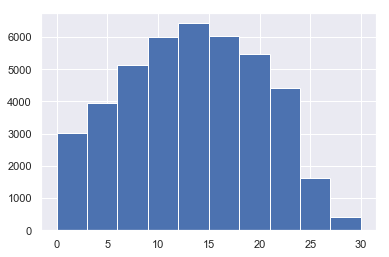

In [62]:
examine(col, data)

**Conclusions:**  
**Missing data:** N/A  
**Extremes:** N/A  
**Unique values:** N/A

**delinq_2yrs:** The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

Analysis:

In [67]:
col = float_cols.index[6]
print('column:', col)

column: delinq_2yrs


rows where data is 0, +inf, or -inf


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max,funded_amnt_is_max,first_loan
0,NaN,5000.0,5000.0,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.000000,0.00,0.0000,Jan-15,171.62,NaN,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
1,NaN,2500.0,2500.0,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.000000,122.90,1.1100,Apr-13,119.66,NaN,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
2,NaN,2400.0,2400.0,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.000000,0.00,0.0000,Jun-14,649.91,NaN,Jun-17,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
3,NaN,10000.0,10000.0,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.970000,0.00,0.0000,Jan-15,357.48,NaN,Apr-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
4,NaN,3000.0,3000.0,3000.00000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783.0,53.90%,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.000000,0.00,0.0000,Jan-17,67.30,NaN,Apr-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
5,NaN,5000.0,5000.0,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-04,3.0,NaN,NaN,9.0,0.0,7963.0,28.30%,12.0,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.000000,0.00,0.0000,Jan-15,161.03,NaN,Feb-17,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
6,NaN,7000.0,7000.0,7000.00000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,n,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-05,1.0,NaN,NaN,7.0,0.0,17726.0,85.60%,11.0,f,0.0,0.0,10137.840010,10137.84,7000.00,3137.84,0.000000,0.00,0.0000,May-16,1313.76,NaN,Sep-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False

highest 20 rows


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max,funded_amnt_is_max,first_loan
0,NaN,5000.0,5000.0,4975.000000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.0,Jan-15,171.62,NaN,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
27466,NaN,15000.0,15000.0,14300.000000,36 months,11.12%,491.94,B,B3,Selman & Associates,7 years,MORTGAGE,92000.0,Verified,Aug-10,Fully Paid,n,Borrower added on 07/26/10 > I am trying to ...,debt_consolidation,Consolidating American Excess Card,797xx,TX,17.02,0.0,Nov-97,1.0,NaN,NaN,4.0,0.0,46571.0,76%,22.0,f,0.0,0.0,16543.022870,15771.02,15000.00,1543.02,0.0,0.0,0.0,Sep-11,10663.56,NaN,Sep-11,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
27468,NaN,25000.0,25000.0,24793.989730,36 months,13.23%,845.13,C,C1,CustomeNews,9 years,MORTGAGE,100000.0,Source Verified,Jul-10,Fully Paid,n,Borrower added on 07/26/10 > Our reason for ...,debt_consolidation,Wedding fund and Credit Card Consolidate,208xx,MD,7.27,0.0,Jan-95,0.0,NaN,NaN,11.0,0.0,12810.0,86%,23.0,f,0.0,0.0,28941.986940,28646.24,25000.00,3941.99,0.0,0.0,0.0,Feb-12,14589.98,NaN,Oct-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
27469,NaN,9275.0,9275.0,9236.106850,36 months,14.72%,320.26,C,C5,Massachusetts General Hospital,2 years,RENT,58000.0,Source Verified,Jul-10,Fully Paid,n,Borrower added on 07/26/10 > I'd like to pay...,credit_card,USAIRWAYS,021xx,MA,7.53,0.0,Jan-96,1.0,NaN,98.0,3.0,1.0,0.0,0%,10.0,f,0.0,0.0,11518.394280,11466.71,9275.00,2243.39,0.0,0.0,0.0,Jun-13,968.29,NaN,Jun-13,0.0,1.0,Individual,0.0,0.0,0.0,1.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
27470,NaN,12000.0,12000.0,11375.000000,36 months,10.38%,389.36,B,B1,American Careers,< 1 year,RENT,39996.0,Not Verified,Jul-10,Fully Paid,n,Borrower added on 07/26/10 > I am a hard wor...,debt_consolidation,consolidation loan,207xx,MD,8.52,0.0,Jan-99,0.0,NaN,NaN,4.0,0.0,5394.0,38.80%,22.0,f,0.0,0.0,13581.404580,12874.04,12000.00,1581.40,0.0,0.0,0.0,Apr-12,6193.21,NaN,Mar-13,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
27471,NaN,9000.0,9000.0,8472.982804,36 months,7.88%,281.53,A,A5,"Certeon, Inc.",4 years,MORTGAGE,52500.0,Not Verified,Jul-10,Fully Paid,n,Borrower added on 07/26/10 > For two bath &q...,home_improvement,New England Re-Bath,017xx,MA,4.18,0.0,May-00,3.0,NaN,NaN,8.0,0.0,2503.0,13%,12.0,f,0.0,0.0,9972.220838,9385.45,9000.00,972.22,0.0,0.0,0.0,Jul-12,3788.18,NaN,Jul-12,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
27472,NaN,6000.0,6000.0,5975.000000,36 months,15.58%,209.71,D,D3,pld associates inc.,9 years,RENT,39600.0,Verified,Jul-10,Fully Paid,n,Borrower added on 07/27/10 > I am good borr...,debt_consolidation,debt consolidation,080xx,NJ,2.88,0.0,Jul-07,3.0,NaN,NaN,5.0,0.0,2812.0,57.40%,6.0,f

lowest 20 rows


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_is_max,funded_amnt_is_max,first_loan
16353,NaN,2800.0,2800.0,2800.0,60 months,16.40%,68.69,E,E1,value plus service,6 years,MORTGAGE,42000.0,Not Verified,Apr-11,Fully Paid,n,NaN,debt_consolidation,Payoff,926xx,CA,4.43,6.0,Feb-95,3.0,16.0,NaN,12.0,0.0,4749.0,55.80%,36.0,f,0.0,0.0,3659.507649,3659.51,2800.00,844.51,15.00,0.00,0.0000,Jul-13,1929.19,NaN,Jul-13,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
10845,NaN,1000.0,1000.0,1000.0,36 months,13.49%,33.94,C,C2,United States Army,9 years,RENT,50000.0,Source Verified,Jul-11,Fully Paid,n,NaN,other,Jul-11,309xx,GA,18.82,6.0,Mar-98,0.0,20.0,NaN,6.0,0.0,531.0,44.20%,16.0,f,0.0,0.0,1217.706230,1217.71,1000.00,217.71,0.00,0.00,0.0000,Apr-14,170.31,NaN,Jun-17,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
3922,NaN,6000.0,6000.0,6000.0,36 months,12.42%,200.50,B,B4,Splice,2 years,RENT,40000.0,Not Verified,Nov-11,Fully Paid,n,Borrower added on 11/02/11 > This is a loan ...,debt_consolidation,Debt Consolidation Loan,554xx,MN,23.10,6.0,May-02,0.0,14.0,NaN,17.0,0.0,9212.0,87.70%,24.0,f,0.0,0.0,6455.877997,6455.88,6000.00,455.88,0.00,0.00,0.0000,Jul-12,5055.39,NaN,Jul-15,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
27064,NaN,12000.0,12000.0,11950.0,36 months,15.95%,421.59,D,D4,VA Hospital of Louisville,4 years,MORTGAGE,72500.0,Verified,Aug-10,Fully Paid,n,Borrower added on 08/06/10 > Home Improvemen...,debt_consolidation,Home Improvement/Debt Consolidation,400xx,KY,22.76,6.0,Dec-93,2.0,6.0,NaN,22.0,0.0,10457.0,33.80%,54.0,f,0.0,0.0,14699.406920,14638.16,12000.00,2699.41,0.00,0.00,0.0000,Jul-12,5443.25,NaN,Aug-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
42310,NaN,9400.0,9400.0,1050.0,36 months,14.70%,324.48,E,E5,MANHATTAN ASSOCIATES,1 year,MORTGAGE,71000.0,Not Verified,Nov-07,Does not meet the credit policy. Status:Fully ...,n,I am wanting to consolidate my current credit ...,debt_consolidation,Consolidating Debt,300xx,GA,21.58,6.0,Sep-99,3.0,17.0,0.0,19.0,0.0,1992.0,18.30%,48.0,f,0.0,0.0,10843.168570,1211.21,9400.00,1443.17,0.00,0.00,0.0000,Feb-09,6302.45,Mar-09,Feb-10,0.0,1.0,Individual,0.0,0.0,0.0,NaN,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
12875,NaN,2500.0,2500.0,2500.0,36 months,13.99%,85.44,C,C3,United States Postal Service,10+ years,MORTGAGE,56810.0,Verified,Jun-11,Fully Paid,n,Borrower added on 06/19/11 > Getting a saltw...,home_improvement,Salt Generator,219xx,MD,19.88,6.0,Jan-90,1.0,4.0,NaN,14.0,0.0,9173.0,30.90%,29.0,f,0.0,0.0,3075.481680,3075.48,2500.00,575.48,0.00,0.00,0.0000,Jul-14,92.66,NaN,Jul-15,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
39921,NaN,15000.0,15000.0,14950.0,36 months,14.46%,516.03,D,D2,Tinker AFB,1 year,MORTGAGE,55000.0,Verified,Nov-10,Does not meet the credit policy. Status:Fully ...,n,NaN,debt_consolidation,Dept Conso,731xx,OK,15.08,6.0,Oct-97,4.0,7.0,NaN,20.0,0.0,9812.0,32.40%,46.0,f,0.0,0.0,18579.369930,18517.44,15000.00,3579.37,0.00,0.00,0

Number of unique values: 13


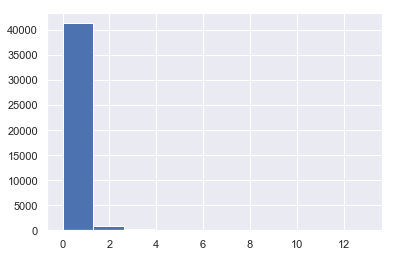

In [68]:
examine(col, data)

**Conclusions:**  
**Missing data:** N/A  
**Extremes:** Will add a boolean column for no delinquencies in past 2 years  
**Unique values:** N/A

In [70]:
data = add_is_zero_col(col, 'no_delinq_2yrs', data)